In [28]:
import sys
sys.path.append("/home/analysis_user/opt_lev_analysis/lib/")
import numpy as np
import grav_util_3 as gu
import matplotlib.pyplot as plt

int_time =1 
sampling_frequency = 5000 # should be 5000 
time = np.arange(0,int_time,1/sampling_frequency) # make a time array

In [35]:
int_time =1 
sampling_frequency = 5000 # should be 5000 
time_s = np.arange(0,int_time,1/sampling_frequency) # make a time array

def force_vs_position(x_sep,height_sep,lambda_val,axis="X",yuk_or_grav="yuk",bead_size=7.6,posvec=np.linspace(-249.5, 249.0, 501)):
    '''
    Using the updated simulation from Chas this gives you position vs force for axis ={"X","Y","Z"} 
    Inputs:
    x_sep = distance in x [um]
    height_sep = distance in z[um] - can be negative
    lambda_val = [um]
    yuk_or_grav = "yuk" or "grav", first is what you want
    bead_size = available are 4.6 and 7.6
    '''
    yuklambda = lambda_val*1e-6
    bs_ff = [int(i) for i in str(bead_size) if i.isdigit()]
    ##print(bs_ff)
    theory_data_dir = "/data/new_trap/simulation/results/%d_%dum-gbead_1um_unit_cells_master/" %(bs_ff[0],bs_ff[1])
    gfuncs_class = gu.GravFuncs(theory_data_dir)
    lambind = np.argmin(np.abs(gfuncs_class.lambdas - yuklambda))
    print(lambind,gfuncs_class.lambdas[lambind])
    ax_dict = {'X':0, "x":0, 'Y':1, 'y':1, 'Z':2,'z':2}
    ones = np.ones_like(posvec)
    pts = np.stack((x_sep*ones, posvec, height_sep*ones), axis=-1)
    #for resp in [0,1,2]:
    if(yuk_or_grav=="yuk"):
        forcevec = gfuncs_class.yukfuncs[ax_dict[axis]][lambind](pts*1.0e-6)
        print("Loaded Yukawa Force")
    elif(yuk_or_grav=="grav"):
        forcevec = gfuncs_class.gfuncs[ax_dict[axis]][lambind](pts*1.0e-6)
        print("Loaded Gravity Force")
    else: print("Pick a valid option, yuk or grav!")
    return posvec,forcevec

# sine
def position_at_time_sin_function(stroke,time_s,frequency,offset_y=0): 
    '''
    get the position for a given frequency and stroke using a pure sine wave. Included an offset in the y direction. 0 is the center of the attractor, which is center of the central gold finger
    '''
    pos_at_time = stroke/2*np.sin(2*np.pi*time_s*frequency)+offset_y
    return pos_at_time

## sinusoidal movement
def force_at_a_time_sin_function(stroke,time_s,frequency,pos_vec,force_vec,offset_y=0):
    '''
    Interpolates between the position to get a smooth force vs time for a sine function
    '''
    osci_pos = position_at_time_sin_function(stroke,time_s,frequency,offset_y=offset_y)
    return np.interp(osci_pos,pos_vec,force_vec, left=None, right=None, period=None)

def force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y=0,yuk_or_grav="yuk",alpha=1,bead_size=7.6):
    '''
    This gives the force as a function of time for a sinusoidial movement in the y-direction. The time parameter is a second sampled with 5kHz.
    '''
    p,f = force_vs_position(x_sep,height_sep,lambda_val,axis=axis,yuk_or_grav=yuk_or_grav,bead_size=bead_size)
    force = alpha * force_at_a_time_sin_function(stroke,time_s,frequency,p,f,offset_y=offset_y)
    return time_s,force

In [36]:
a = position_at_time_sin_function(200,time,3,offset_y=0) 


In [37]:
b  = position_at_time_sin_function(-200,time,3,offset_y=50) 

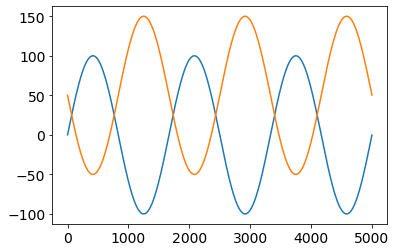

In [38]:
plt.plot(a)
plt.plot(b)

In [74]:
105.95-(-96.2)

202.15

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


In [79]:
x_sep = 13.9#10.39
height_sep=-15.23#-15.7
stroke=-200
frequency=3
lambda_val=9.74#20
axis="z"
offset_y=-5.1
yuk_or_grav="yuk"
alpha=1
bead_size=7.6
signal_sim2 = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


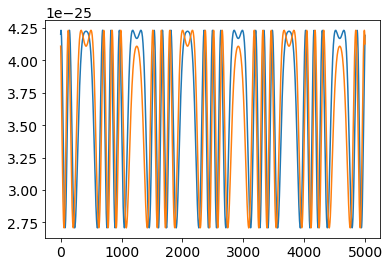

In [80]:
plt.plot(signal_sim[1])
plt.plot(signal_sim2[1])

In [111]:
chas_test = np.load("test_signal.npy")

x_sep = 13.9#10.39
height_sep=-15.23#-15.7
stroke=202.15
frequency=3
lambda_val=9.74#20
axis="z"
offset_y=-4.9
yuk_or_grav="yuk"
alpha=1
bead_size=7.6
signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


(0.0, 5000.0)

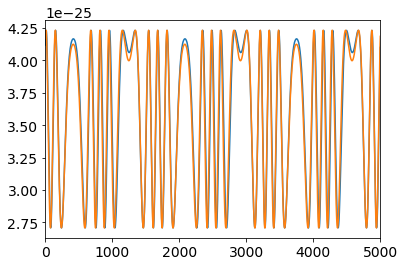

In [112]:
plt.plot(signal_sim[1])
#plt.plot(signal_sim2[1])
plt.plot(chas_test[3])
plt.xlim(0,5000)